<a href="https://colab.research.google.com/github/Arobnett/Reddit-Comment-Predictions-Based-on-Topic-Model-with-SHAP-Analysis/blob/main/AF_2_Top2Vec_Model_Reddit_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SHapley Additive exPlanations Model Interpretability Analysis for Top2Vec Natural Language Processing**: Part 3

## **III. Proposed Methods**: continued

## **III.B. Topic Modeling:**

Topic modeling is the process of extracting underlying structures within a collection of texts in the form of statistical language models. This involves representing a text in a topic space rather than in its feature space in a process called dimensionality reduction. By building clusters of words in the form of topics that make up a text with each topic cluster having a particular weight using an Unsupervised Learning process, the information within abstract topic clusters can be best represented from the document collection using a tagging process. [[4]](https://github.com/kapadias/mediumposts/blob/master/natural_language_processing/topic_modeling/notebooks/Introduction%20to%20Topic%20Modeling.ipynb)

### **B.1. Top2Vec Algorithm:**

Top2Vec expresses the semantic similarity from the distance between document and word vectors that the topic vectors are jointly embedded with by using joint document and word semantic embedding to find topic vector clusters. Top2Vec can automatically find the number of topics without the use of stop-word lists, stemming, or lemmatization. The Top2Vec algorithm comprises the following steps: [[5]](https://arxiv.org/abs/2008.09470)


**1.a. Create the jointly embedded document and word vectors using Doc2Vec.**

* In this step, the algorithm generates the embedding where the distance between document vectors and word vectors represents semantic association. A Doc2Vec model is used to learn document embeddings to estimate a distributed representation of documents using a model architecture called a  Paragraph Vector Distributed Bag of Words (PV-DBOW). As a common fixed-length vector representation for texts within machine learning algorithms such as k-means or logistic regression, Bag-of-Words (BOW) can be used for clustering and text classification functions that utilizes applications such as web searching, spam filtering, and document retrieval.
* Paragraph Vectors come from the unsupervised learning of fixed-length feature representations of variable-length pieces of texts including sentences, paragraphs, and documents. The unsupervised learning algorithm is trained to predict words in the document in order to represent each document as a dense vector. Paragraph vector learning comes from word vector learning methods such as Word2Vec. In the example figure here, the context from the three words “the,” “cat,” and “sat” is used to predict the fourth word “on”, which is mapped to the matrix W columns for the output word prediction. [[5]](https://arxiv.org/abs/2008.09470) [[6]](https://arxiv.org/abs/1405.4053)

* 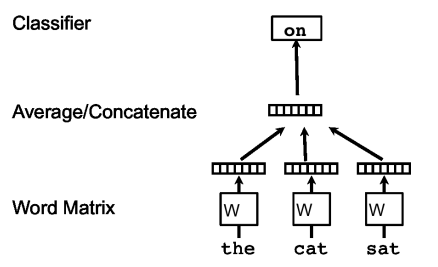

* In the Word2Vec learning framework, every word is mapped to a unique vector in the form of a column within matrix W. By indexing the column by the word position within the vocabulary, the concatenation takes the sum of the vectors to use as features to predict the next word in a sentence. The word vector mode is supposed to maximize the average log probability given a sequence of training words.

* 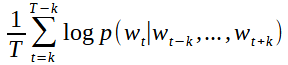

* A multi-class classifier, such as Softmax is used for the prediction task.

* image.png = 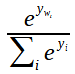

* The value of each yi represents an un-normalized log-probability for each output word i, where U and b are the softmax parameters and h is generated from the average of word vectors extracted from W.

* y = image.png

* PV-DBOW trains paragraph vectors to predict words in a small window, ignoring the word context from the input to predict randomly sampled words from the paragraph output. The classifier samples a random word from a randomly sampled text window at each stochastic gradient descent iteration given to the paragraph vector.

* 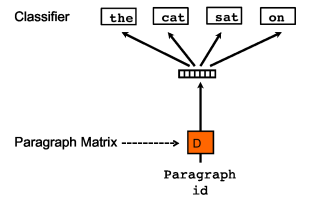

* The surrounding word in a context window is predicted by DBOW swapping the context word with the document vector. This similarity allows for joint embedding, which occurs when the simultaneous training of document and word vectors become interleaved. A dense area of documents within a semantic space can be interpreted as an area of highly similar documents indicative of an underlying common topic. The topics of the documents represented by the document vectors can have the average of those vectors calculated as the centroid, which is most representative of the dense area of documents it’s calculated from. The topic vector gives the best semantic description of the words closest to it, with each number of dense clusters representing a number of prominent topics. [[6]](https://arxiv.org/abs/1405.4053)

**1.b. Create lower dimensional embedding of document vectors using UMAP.**


* The Uniform Manifold Approximation and Projection (UMAP) algorithm is a manifold learning technique for dimension reduction that approximates the manifold that the data is assumed to lie on. The geodesic distance on the manifold can be approximated by letting the input data be X = {X1,..., XN}, meaning that a ball centered at Xi with exactly the k-nearest-neighbors of Xi should have approximately fixed volume regardless of the choice of Xi ∈ X. The validity of assumption of uniform distribution on the manifold can be ensured with a custom distance for each Xi. The functors between the relevant categories to convert from metric spaces to fuzzy topological representations provide a means to merge the incompatible local views of the data.
* Letting Y = {Y1,..., YN}, ⊆ Rd be a low dimensional (d << n) representation of X such that Yi represents the source data point Xi, a target manifold for Y can be chosen from the former, so that the manifold and manifold metric from the former can be known to directly compute the fuzzy topological representation. To incorporate the distance to the nearest neighbor for the local connectivity requirement, a parameter can be supplied that defines the expected distance between nearest neighbors in the embedded space. [[8]](https://arxiv.org/abs/1802.03426)
* For the Top2Vec algorithm, the number of nearest neighbors is set to 15 to give more emphasis on local structure. The distance metric to measure the distance between points in the high dimensional space is the cosine similarity to measure the similarity of documents irrespective of their size. [[5]](https://arxiv.org/abs/2008.09470)

**1.c. Find dense areas of documents using HDBSCAN.**

* Hierarchical Density-based spatial clustering of applications with noise (HDBSCAN) assigns a label for each dense cluster of document vectors and assigns a noise label to all document vectors that are not in a dense cluster so that the dense areas of identified document vectors can be used to calculate the topic vectors. Documents that are classified as noise are considered not to be descriptive of a prominent topic. [[5]](https://arxiv.org/abs/2008.09470)

* HDBSCAN main steps:
    1. Compute the core distance for all data objects.
    2. Compute the mutual reach-ability distance graph.
    3. Add for each vertex a “self edge” with the core distance of the corresponding object as a weight.
    4. Extract the HDBSCAN hierarchy as a dendrogram diagram representing a tree:
        ◦ 4.1 The tree assigns all objects the same label for the root of the single cluster. 
        ◦ 4.2 Iteratively remove all edges in decreasing order of weights: [[8]](https://link.springer.com/chapter/10.1007/978-3-642-37456-2_14)
            ▪ 4.2.1 Set the dendrogram scale value of the current hierarchical level as the weight of the edges to be removed before each removal.
            ▪ 4.2.2 Assign labels to the connected components that contain the end vertices of the removed edges, to obtain the next hierarchical level and assign a new cluster label to a component if it still has at least one edge, or assign it a null noise label after each removal. 

**1.d. Calculate the centroid of document vectors in the original dimension for each dense area to find the topic vector.**

* The dense document clusters and noise documents identified by HDBSCAN in the UMAP reduced dimension, correspond to locations in the original semantic embedding space so that each document in the embedding space can be labeled with either a noise label or a dense cluster label. The topic vector can be calculated from the document vectors similarly to how the labels for each dense cluster of documents can be calculated. The centroid can be calculated by finding the arithmetic mean of all the document vectors in the same dense cluster. [[5]](https://arxiv.org/abs/2008.09470)

**1.e. Find n-closest word vectors to the resulting topic vector.** 

* Every point in the semantic space represents a topic best described semantically by its nearest word vectors that are closest to a topic vector most representative of semantically where the distance between each word vector to the topic vector indicates how semantically similar the word is to the topic. The words closest to the topic vector can be considered as the words most similar to all documents in that dense area, with the topic vector being the centroid of that area to summarize the common topic of the documents in the dense area. Common words appearing in most documents are often in a region of the semantic space equally distant from all documents so the words closest to a topic vector should rarely be stop-words, so there shouldn’t be a need for stop-word removal. [[5]](https://arxiv.org/abs/2008.09470)

# **I.V. Results and Analysis**

## **INSTALLATIONS:**


In [ ]:
!pip install top2vec # For Topic Model
!pip install pyyaml h5py # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **IMPORTED LIBRARIES**

In [ ]:
from top2vec import Top2Vec # To process a topic clustering of the data.

ValueError: ignored

In [ ]:
import pandas as pd  # To read the csv file to a data frame.
import numpy as np # To set a randomization seed.

import tensorflow as tf # Save model.
from tensorflow import keras # Load model.
print(tf.version.VERSION)


### **UPLOAD DATA**

In [ ]:
# Previously web scraped Sub-Reddit Text Data:
reddit_data = "/AF_comments_100k.csv"
# Reads the csv dataset file into a data frame:
df = pd.read_csv(reddit_data)
# Converts the data frame Reddit comment 'body' column to a list.
documents = df['body'].tolist()
# Converts all document in list to string types.
documents = list(map(str, documents))

In [ ]:
documents

## **Topic Model**:

Build Top2Vec Model: [[9]](https://top2vec.readthedocs.io/en/latest/index.html) [[10]](https://top2vec.readthedocs.io/en/latest/index.html) 

In [ ]:
"""
Tutorial source reference:
    @article{angelov2020top2vec,
          title={Top2Vec: Distributed Representations of Topics},
          author={Dimo Angelov},
          year={2020},
          eprint={2008.09470},
          archivePrefix={arXiv},
          primaryClass={cs.CL}
    }
"""

# Sets a randomization seed.
np.random.seed(0)

# Trains the Topic Model.
model = Top2Vec(documents = documents, # List of strings from Reddit comments.
                # Sets speed the model takes to train 
                # in exchange for vector quality.
                speed = "deep-learn", 
                # To speedup for large datasets.
                use_corpus_file = True)


In [ ]:
# Get Number of Topics Clusters generated from model.
num_topics = model.get_num_topics()
print("The number of topics that Top2Vec has found in the data: ")
print(num_topics)
# Get Topic Sizes.
topic_sizes, topic_nums = model.get_topic_sizes()
print("The number of documents most similar to each topic, aka topic sizes: ")
print(topic_sizes)
print("The unique index of every topic will be returned, aka topic number: ")
print(topic_nums)
# Get Topics.
topic_words, word_scores, topic_nums = model.get_topics(num_topics)
print("The top 50 words for each topic in order of semantic similarity, aka topic words: ")
print(topic_words)
print("The cosine similarity scores of the top 50 words to each topic, aka word scores: ")
print(word_scores)
print("The unique index of every topic will be returned: ")
print(topic_nums)


Expected output:

The number of topics that Top2Vec has found in the data: 
903
The number of documents most similar to each topic, aka topic sizes: 
[3932  532  385  337  332  329  325  324  319  316  313  306  305  303
  296  284  281  281  277  272  266  265  264  264  263  263  260  260
  260  259  258  254  250  245  244  242  241  240  238  238  235  234
  233  233  231  230  227  227  226  226  224  223  222  222  221  220
  220  220  216  215  213  212  211  211  209  208  208  207  206  206
  206  205  205  205  204  204  204  204  204  204  203  202  202  200
  199  199  199  198  197  197  197  197  196  196  195  194  193  192
  191  191  190  190  189  189  188  188  187  185  185  185  185  184
  184  184  184  183  181  181  180  180  180  180  180  180  177  177
  176  175  175  175  174  174  174  174  174  173  173  171  171  170
  170  170  170  170  169  169  167  167  167  166  166  166  166  165
  165  164  163  163  162  161  161  160  160  160  160  159  159  159
  158  157  157  157  157  157  157  156  156  156  155  155  155  155
  155  155  155  154  154  153  152  152  152  152  152  152  152  152
  151  151  151  151  151  150  150  149  149  148  146  145  145  145
  144  143  143  143  142  142  142  142  141  141  141  141  141  141
  141  140  140  140  140  139  139  139  139  139  138  138  138  138
  137  137  137  137  136  136  136  135  135  135  134  134  134  134
  134  133  133  132  132  132  132  132  131  131  131  130  130  130
  129  129  129  129  128  128  128  128  128  128  128  128  127  127
  126  126  125  125  125  125  125  125  124  124  124  124  124  123
  123  123  122  122  122  122  122  122  122  122  121  121  121  121
  120  120  120  120  120  119  119  118  118  118  117  117  117  117
  116  116  116  115  115  115  115  115  115  115  115  115  115  114
  114  114  114  113  113  113  113  113  113  112  112  112  112  112
  111  111  111  110  110  110  109  109  109  109  109  109  109  109
  108  108  108  107  107  107  107  107  107  107  107  107  107  106
  106  106  106  106  106  106  105  105  105  105  104  104  104  104
  104  103  103  103  103  102  102  102  102  101  101  101  101  101
  101  101  100  100   99   99   99   99   98   98   98   98   98   98
   97   97   97   97   96   96   95   94   94   94   94   94   94   94
   94   94   93   93   93   93   93   93   93   92   92   92   92   91
   91   91   91   91   91   91   91   90   90   90   90   90   90   90
   90   90   89   89   89   89   88   88   88   88   87   87   87   87
   87   87   86   86   86   86   86   86   86   85   85   85   85   85
   85   84   84   84   84   84   84   84   83   83   83   83   83   82
   82   82   82   82   82   82   81   81   81   81   81   80   80   80
   80   80   80   80   79   79   79   79   79   78   78   78   78   78
   78   77   77   77   77   77   77   77   77   76   76   76   76   76
   76   76   75   75   75   75   74   74   74   74   74   74   74   73
   73   73   73   73   73   73   73   72   72   72   72   72   72   72
   72   72   72   71   71   71   71   71   71   71   71   71   70   70
   70   70   70   70   70   69   69   69   69   68   68   68   68   68
   68   68   68   67   67   67   67   67   67   67   67   67   66   66
   66   66   66   66   66   66   65   65   65   65   65   65   65   65
   65   65   65   65   64   64   64   64   64   64   64   63   63   63
   63   62   62   62   62   62   61   61   61   61   61   61   61   61
   61   61   61   60   60   60   60   60   60   60   60   59   59   59
   59   59   58   58   58   58   58   58   58   58   57   57   57   57
   57   57   57   57   57   57   56   56   56   56   56   56   56   56
   56   56   55   55   55   55   54   54   54   54   53   53   53   53
   53   53   52   52   52   52   52   52   52   51   51   51   51   51
   51   51   51   51   51   51   51   50   50   50   50   50   49   49
   49   49   49   49   49   49   48   48   48   48   48   48   48   48
   47   47   47   47   47   47   47   46   46   46   46   46   46   45
   45   45   45   45   45   45   44   44   44   44   44   44   44   43
   43   43   42   42   42   42   42   42   41   41   41   41   41   41
   41   41   41   40   40   40   40   40   40   39   39   39   39   39
   39   38   38   38   38   38   37   37   37   37   37   37   37   37
   37   37   36   36   36   36   36   36   35   35   35   35   35   34
   34   34   34   34   34   33   33   33   33   33   33   33   33   33
   33   32   32   32   31   31   31   31   30   30   30   30   30   30
   29   29   29   29   28   28   28   28   28   28   28   27   27   27
   27   27   26   26   26   26   25   25   25   25   24   24   23   23
   23   22   22   21   21   20   17]
The unique index of every topic will be returned, aka topic number: 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593
 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611
 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629
 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647
 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665
 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683
 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701
 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719
 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737
 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755
 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773
 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791
 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809
 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827
 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845
 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863
 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881
 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899
 900 901 902]
The top 50 words for each topic in order of semantic similarity, aka topic words: 
[['duty' 'training' 'active' ... 'lot' 'status' 'service']
 ['technical' 'leaders' 'experts' ... 'creating' 'mentor' 'motivated']
 ['be' 'should' 'however' ... 'yourself' 'they' 'and']
 ...
 ['afscbot' 'associated' 'source' ... 'banned' 'development' 'here']
 ['np' 'exists' 'compose' ... 'pm' 'index' 'https']
 ['came' 'dad' 'hated' ... 'stopped' 'knew' 'bird']]
The cosine similarity scores of the top 50 words to each topic, aka word scores: 
[[0.28384146 0.27976367 0.24771823 ... 0.1779891  0.17775331 0.1777234 ]
 [0.4213605  0.4212584  0.37814057 ... 0.23306786 0.23030587 0.22907776]
 [0.24732238 0.2460678  0.24267174 ... 0.21598555 0.21531823 0.21495312]
 ...
 [0.55242527 0.54166716 0.4870991  ... 0.14586747 0.14003974 0.13867842]
 [0.49327412 0.47663486 0.45665285 ... 0.1643581  0.16249655 0.16066736]
 [0.19106115 0.16399616 0.11116476 ... 0.06274748 0.06250515 0.06100066]]
The unique index of every topic will be returned: 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593
 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611
 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629
 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647
 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665
 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683
 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701
 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719
 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737
 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755
 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773
 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791
 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809
 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827
 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845
 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863
 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881
 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899
 900 901 902]

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('Top2VecModel.h5') 

# **TOPIC CLUSTER QUALITY VALIDATION**

* To build the initial Top2Vec Model, it was found that most of the default parameters worked well to general qualitatively recognizable topic cluster word clouds, with the speed of the modeling parameter set to “deep-learn” to optimize topic vector quality despite slower processing speeds. [[9]](https://top2vec.readthedocs.io/en/latest/index.html) [[10]](https://top2vec.readthedocs.io/en/latest/index.html) 
* To ensure that the Top2Vec model was clustering jointly embedded word and document vectors in a sensible manner, a qualitative assessment step was utilized that would use search keywords. “PCS” and “depression” were the chosen keywords given that they were to be used for time series, correlation

In [ ]:
# Searching for topic clusters most similar to "depression".
d_topic_words, d_word_scores, d_topic_scores, d_topic_nums = model.search_topics(keywords=["depression"], num_topics=1)
print("The top 50 topic words in order of semantic similarity " 
      + "to the search keyword, 'depression': ")
print(d_topic_words)
print("The cosine similarity scores of the top 50 words " 
      + "for the search keyword, 'depression': ")
print(d_word_scores)
print("The cosine similarity of each topic to the search keyword," 
      + " 'depression': ")
print(d_topic_scores)
print("The unique index of every topicmost similar to 'depression': ")
print(d_topic_nums)
# Generate Word Clouds
print("Topic cluster most similar to 'depression': ")
print(d_topic_nums[0])
for topic in d_topic_nums:
    model.generate_topic_wordcloud(topic)

# Search for topics most similar to "PCS".
p_topic_words, p_word_scores, p_topic_scores, p_topic_nums = model.search_topics(keywords=["PCS"], num_topics=1)
print("The top 50 topic words in order of semantic similarity to the search keyword," 
      + " 'PCS': ")
print(p_topic_words)
print("The cosine similarity scores of the top 50 words for the search keyword," 
      + " 'PCS': ")
print(p_word_scores)
print("The cosine similarity of each topic to the search keyword," 
      + " 'PCS': ")
print(p_topic_scores)
print("The unique index of every topic most similar to 'PCS': ")
print(p_topic_nums)
# Generate Word Clouds
print("Topic cluster most similar to 'PCS': ")
print(p_topic_nums[0])
for topic in p_topic_nums:
    model.generate_topic_wordcloud(topic)



Expected output:

The top 50 topic words in order of semantic similarity to the search keyword, 'depression': 
[array(['meds', 'medication', 'anxiety', 'diagnosed', 'pcm', 'doctor',
       'treatment', 'depression', 'mh', 'counseling', 'therapy',
       'diagnosis', 'condition', 'mental', 'prescription', 'provider',
       'meps', 'doc', 'suicidal', 'med', 'waiver', 'anti', 'medical',
       'effects', 'meb', 'disqualified', 'cleared', 'pain',
       'appointments', 'health', 'prp', 'waivers', 'disability',
       'personality', 'doctors', 'medically', 'docs', 'dq', 'ts',
       'patients', 'depressed', 'injury', 'discharge', 'conditions',
       'sessions', 'referral', 'surgery', 'symptoms', 'seek', 'recruiter'],
      dtype='<U15')]
The cosine similarity scores of the top 50 words for the search keyword, 'depression': 
[array([0.676029  , 0.63478976, 0.52710086, 0.5059389 , 0.43668702,
       0.41879737, 0.37909773, 0.36474216, 0.34964848, 0.34864593,
       0.34626597, 0.3345733 , 0.32533443, 0.32460025, 0.32105005,
       0.32026282, 0.28600278, 0.27852705, 0.26784587, 0.266853  ,
       0.26681775, 0.264766  , 0.25673756, 0.2473452 , 0.24649589,
       0.24377966, 0.24185981, 0.23112544, 0.22179471, 0.22018164,
       0.21998611, 0.21751031, 0.21633506, 0.2162527 , 0.21559668,
       0.21306546, 0.20967266, 0.20939107, 0.209016  , 0.20697694,
       0.2052529 , 0.20180143, 0.20135863, 0.19757222, 0.19718264,
       0.19681588, 0.19594608, 0.19539964, 0.19499071, 0.19354653],
      dtype=float32)]
The cosine similarity of each topic to the search keyword, 'depression': 
[0.3647422]
The unique index of every topicmost similar to 'depression': 
[169]
Topic cluster most similar to 'depression': 
169
The top 50 topic words in order of semantic similarity to the search keyword, 'PCS': 
[array(['oconus', 'conus', 'overseas', 'deros', 'assignment', 'stateside',
       'bop', 'assignments', 'korea', 'pcs', 'os', 'fta', 'retainability',
       'tours', 'tour', 'bases', 'dream', 'sheet', 'short', 'retraining',
       'cycle', 'efmp', 'rnltd', 'denied', 'ideal', 'window', 'location',
       'follow', 'italy', 'ramstein', 'extend', 'listing', 'dos',
       'preference', 'pacaf', 'ams', 'pcsing', 'justification',
       'stationed', 'retrain', 'hawaii', 'locations', 'depend', 'mpf',
       'exception', 'germany', 'etp', 'projected', 'station', 'extended'],
      dtype='<U15')]
The cosine similarity scores of the top 50 words for the search keyword, 'PCS': 
[array([0.5450941 , 0.53388906, 0.41158578, 0.34620008, 0.32095107,
       0.31633326, 0.28967157, 0.28023943, 0.24741039, 0.246389  ,
       0.24532579, 0.24271913, 0.24218284, 0.2339215 , 0.22921321,
       0.20734324, 0.18397704, 0.1795304 , 0.17879863, 0.17300153,
       0.17026746, 0.16977602, 0.15874982, 0.15693139, 0.1562697 ,
       0.15456451, 0.15399498, 0.1519309 , 0.14805073, 0.14734182,
       0.14573589, 0.14462602, 0.14288741, 0.1424289 , 0.1380119 ,
       0.13634174, 0.1307197 , 0.12984104, 0.1296129 , 0.12863076,
       0.12820221, 0.12799817, 0.12797637, 0.12795147, 0.12777556,
       0.12630527, 0.12376788, 0.12051501, 0.1196177 , 0.11927   ],
      dtype=float32)]
The cosine similarity of each topic to the search keyword, 'PCS': 
[0.24638901]
The unique index of every topic most similar to 'PCS': 
[637]
Topic cluster most similar to 'PCS': 
637

**General Intended Output:**
*   Depression Topic Word Cloud
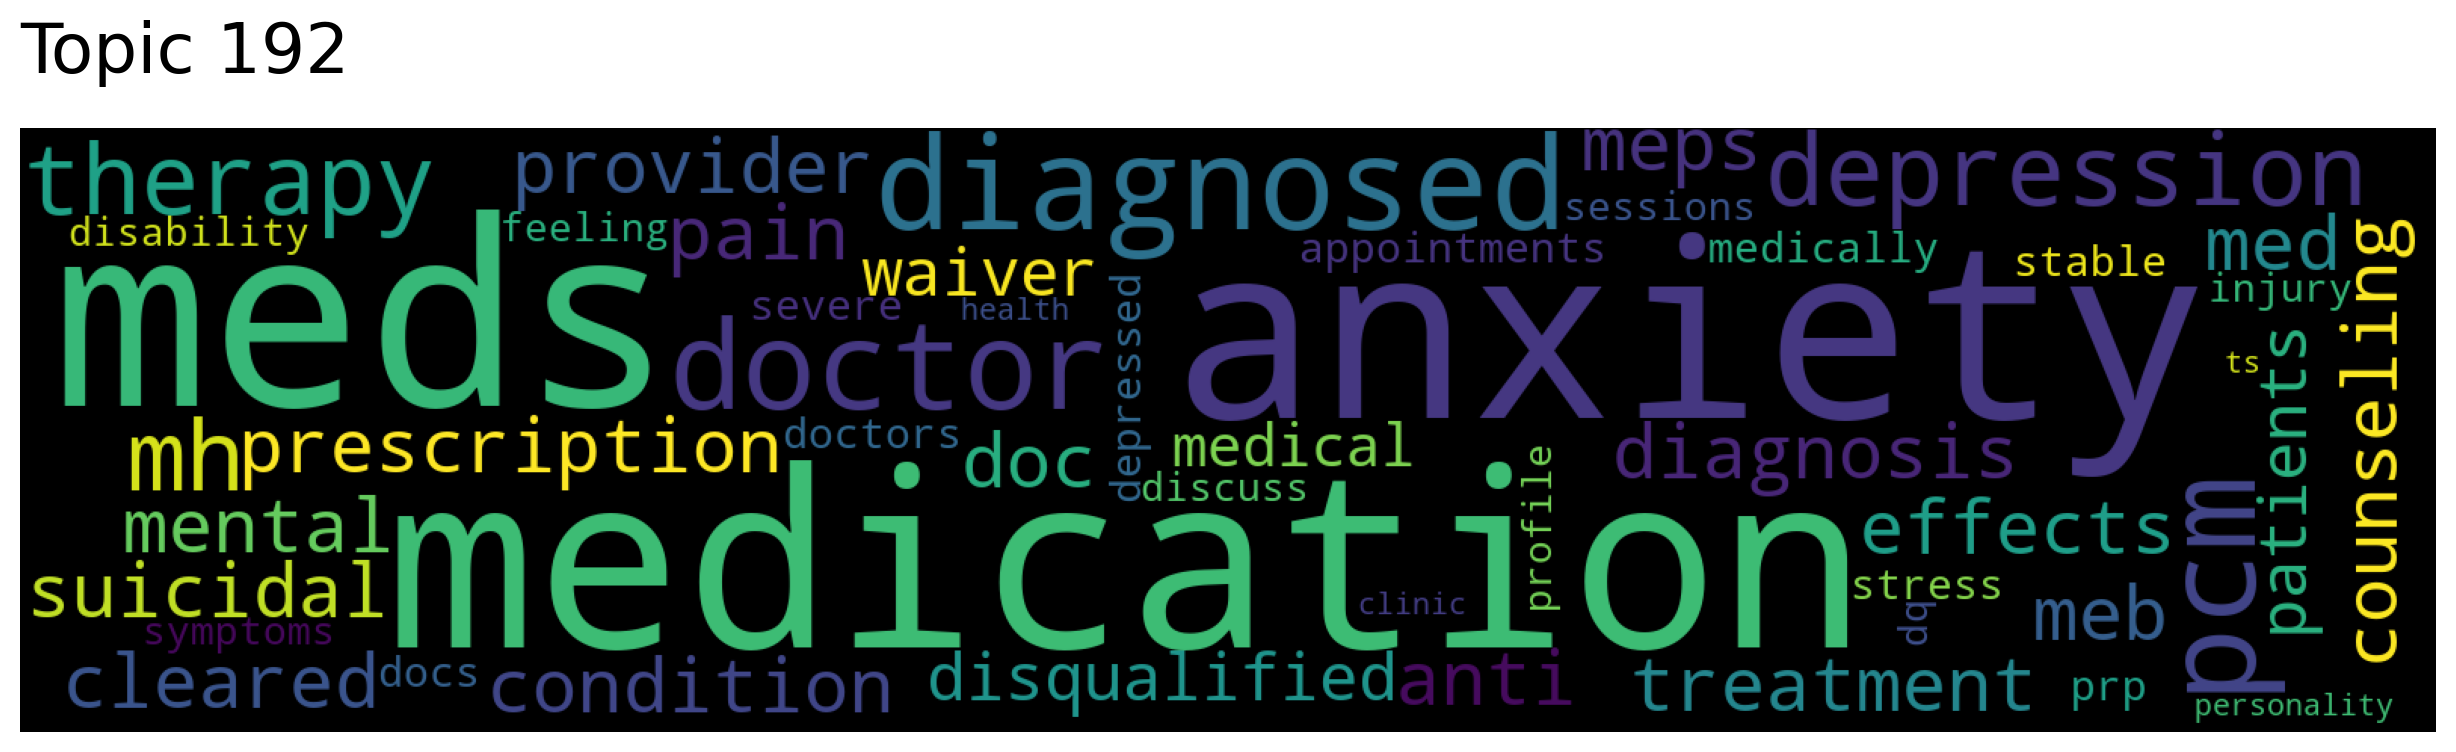
*   Permanent Change of Station Topic Word Cloud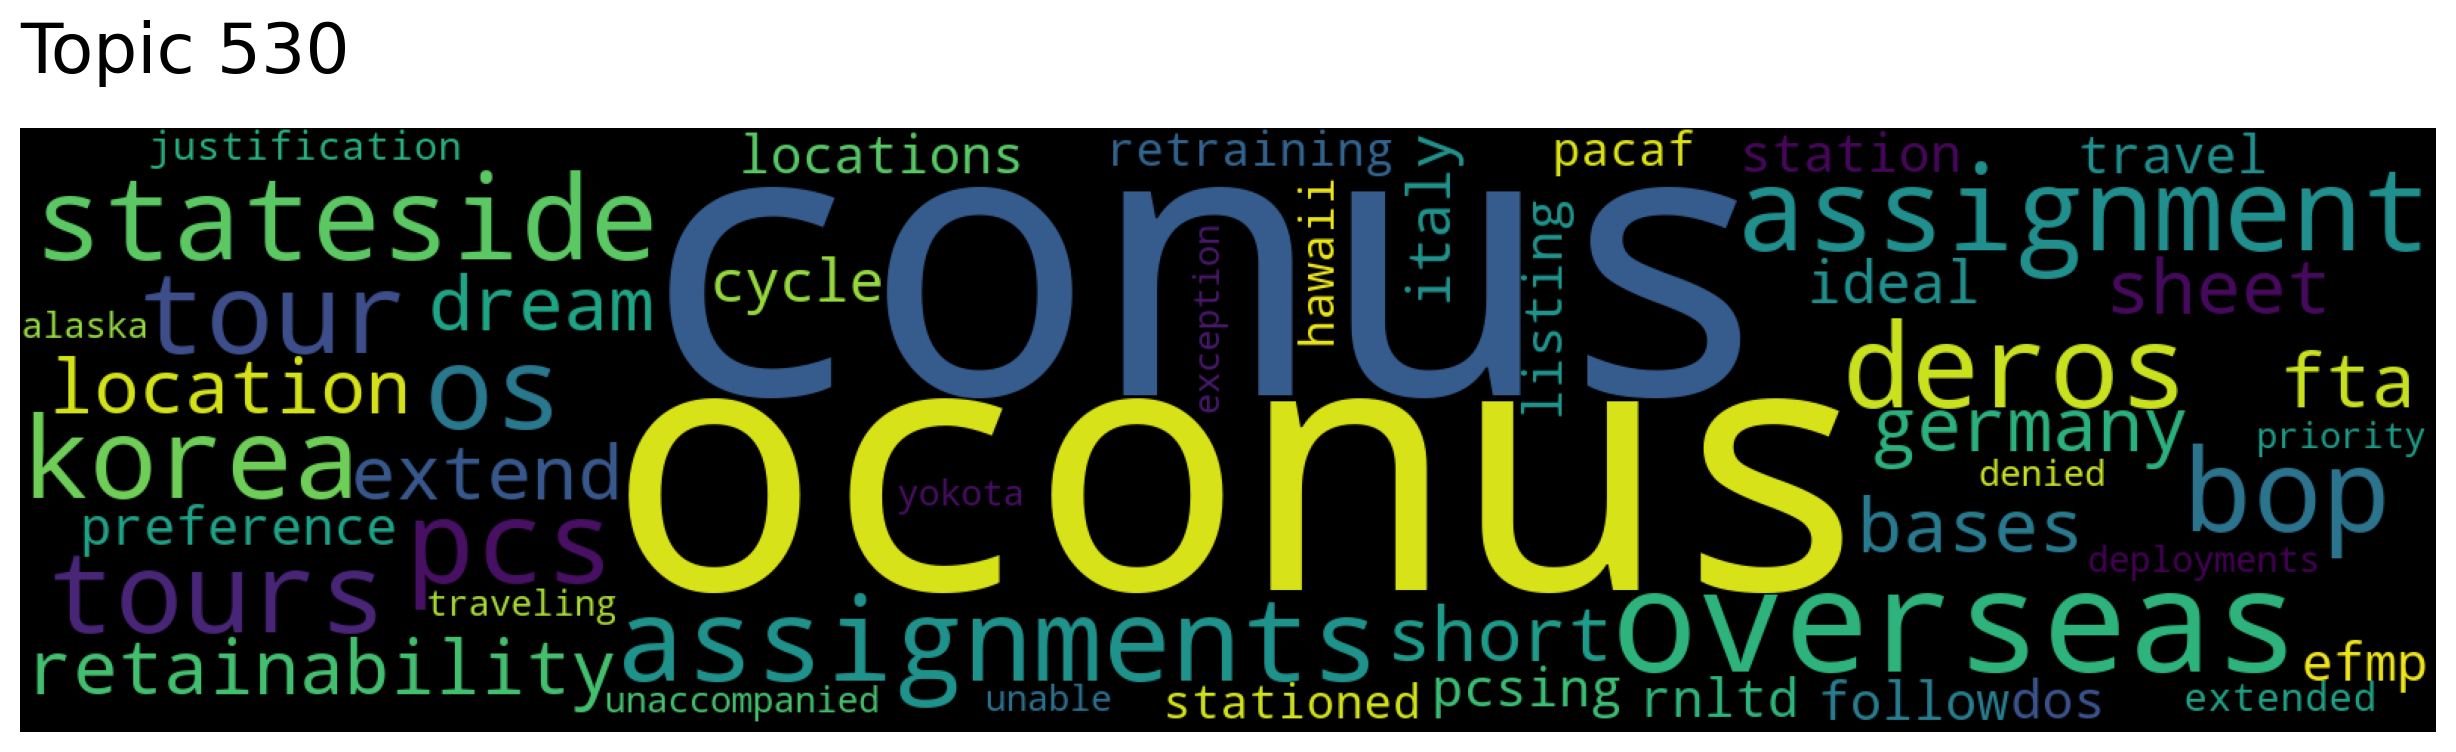



# **Counts of the permanent change of station and mental health topic related subreddit comments.**

In [ ]:
# Dataframe for body of comments and UTC dates:
# Extracts comment body and UTC date columns from dataframe.
df_body_UTC = df.iloc[:, [5,7]] 
print(type(df_body_UTC))
print(df_body_UTC.head()) # Displays top five dataframe rows.
# Converts UTC column to list.
UTC_dates = df['created_utc'].tolist()
# Array of UTC dates.
UTC_dates_ids = list(range(len(UTC_dates)))



In [ ]:
# Array of documents.
doc_ids = list(range(len(documents))) # ID of every document in the dataset.
# Topic cluster label (numerical) for every document in the dataset.
document_labels = model.get_documents_topics(doc_ids) 
document_labels[0] # Displays array.

In [ ]:
# Array of UTC dates.
date_UTC_ids = list(range(len(UTC_dates))) # ID of every UTC date in the dataset.
# Topic cluster label (numerical) for every UTC date in the dataset.
UTC_dates_labels = model.get_documents_topics(date_UTC_ids) 
UTC_dates_labels[0] # Displays array.

# **ENUMERATE:**

Documents

In [ ]:
# Depression + PCS 
import random
# Initializes list of topic cluster labels (PCS and depression) for each document.
depression_pcs_document_labels = [] 
# Initializes list of document comment bodies (PCS and depression).
depression_pcs_documents = []
# Keeps count of PCS and depression similar documents.
depression_PCS_count = 0 
depression_count = 0 
pcs_count = 0 

# Uses Enumerate() to count various items by looping through document indexes and cluster IDs.
for doc_index, cluster_id in enumerate(document_labels[0]):
  # To keep count of 'depression' + 'PCS' documents.
  add_document_to_depression_pcs_documents = False 

  if cluster_id == d_topic_nums[0]: # If cluster ID is a depression topic:
    depression_count += 1 # Increment count of depression documents by one.
    
    # Add depression label to depression label list.
    depression_pcs_document_labels.append('depression') 
    
    # Set depression document to add to depression + PCS list.
    add_document_to_depression_pcs_documents = True 
 
 
  elif cluster_id == p_topic_nums[0]: # If cluster ID is a PCS topic:
    pcs_count += 1 # Increment count of pcs documents by one.

    # Add depression label to PCS label list.
    depression_pcs_document_labels.append('pcs') 

    # Set PCS document to add to depression + PCS list.
    add_document_to_depression_pcs_documents = True
   

  # Add document to depression + PCS list.
  if add_document_to_depression_pcs_documents:
    depression_pcs_documents.append(documents[doc_index])

depression_PCS_count = depression_count + pcs_count
print("List of each comment document: ")
print(depression_pcs_documents)

print("Both 'depression' and 'PCS' List of each comment document label: ")
print(depression_pcs_document_labels)

print(f"depression category count: {depression_count}")
print(f"PCS category count: {pcs_count}")
print("'depression' + 'PCS' list for comment count: ")
print(depression_PCS_count)


In [ ]:
# Depression
# Initializes list of topic cluster labels (PCS and depression) for each document.
depression_document_labels = [] 
# Initializes list of document comment bodies (PCS and depression).
depression_documents = []
depression_count = 0 # Depression count.

# Uses Enumerate() to count various items by looping through document indexes and cluster IDs.
for doc_index, cluster_id in enumerate(document_labels[0]):
  # To keep count of 'depression' + 'PCS' documents.
  add_document_to_depression_documents = False 

  if cluster_id == d_topic_nums[0]: # If cluster ID is a depression topic:
    depression_count += 1 # Increment count of depression documents by one.
    
    # Add depression label to depression label list.
    depression_document_labels.append('depression') 
    
    # Set depression document to add to depression + PCS list.
    add_document_to_depression_documents = True 
 
   

  # Add document to depression + PCS list.
  if add_document_to_depression_documents:
    depression_documents.append(documents[doc_index])

depression_count = depression_count
print("List of each depression comment document: ")
print(depression_documents)

print(f"depression category count: {depression_count}")



In [ ]:
# PCS
import random
# Initializes list of topic cluster labels (PCS and depression) for each document.
pcs_document_labels = [] 
# Initializes list of document comment bodies (PCS and depression).
pcs_documents = []
pcs_count = 0 

# Uses Enumerate() to count various items by looping through document indexes and cluster IDs.
for doc_index, cluster_id in enumerate(document_labels[0]):
  # To keep count of 'depression' + 'PCS' documents.
  add_document_to_pcs_documents = False 
 
  if cluster_id == p_topic_nums[0]: # If cluster ID is a PCS topic:
    pcs_count += 1 # Increment count of pcs documents by one.

    # Add depression label to PCS label list.
    pcs_document_labels.append('pcs') 

    # Set PCS document to add to depression + PCS list.
    add_document_to_pcs_documents = True
   

  # Add document to depression + PCS list.
  if add_document_to_pcs_documents:
    pcs_documents.append(documents[doc_index])


print("List of each PCS comment document: ")
print(pcs_documents)



print(f"PCS category count: {pcs_count}")



# Dates UTC

In [ ]:
# Depression + PCS 
import random 
# Initializes list of topic cluster labels (PCS and depression) for each UTC_dates.
depression_pcs_UTC_dates_labels = [] 
# Initializes list of UTC_dates comment bodies (PCS and depression).
depression_pcs_UTC_dates = []
# Keeps count of PCS and depression similar UTC_dates.
depression_PCS_count = 0 
depression_count = 0 
pcs_count = 0 

# Uses Enumerate() to count various items by looping through UTC_dates indexes and cluster IDs.
for UTC_date_index, cluster_id in enumerate(UTC_dates_labels[0]):
  # To keep count of 'depression' + 'PCS' UTC_dates.
  add_UTC_date_to_depression_pcs_UTC_dates = False 

  if cluster_id == d_topic_nums[0]: # If cluster ID is a depression topic:
    depression_count += 1 # Increment count of depression UTC_dates by one.
    
    # Add depression label to depression label list.
    depression_pcs_UTC_dates_labels.append('depression') 
    
    # Set depression UTC_date to add to depression + PCS list.
    add_UTC_date_to_depression_pcs_UTC_dates = True 
 
 
  elif cluster_id == p_topic_nums[0]: # If cluster ID is a PCS topic:
    pcs_count += 1 # Increment count of pcs UTC_dates by one.

    # Add depression label to PCS label list.
    depression_pcs_UTC_dates_labels.append('pcs') 

    # Set PCS UTC_date to add to depression + PCS list.
    add_UTC_date_to_depression_pcs_UTC_dates = True
   

  # Add UTC_date to depression + PCS list.
  if add_UTC_date_to_depression_pcs_UTC_dates:
    depression_pcs_UTC_dates.append(UTC_dates[UTC_date_index])

depression_PCS_count = depression_count + pcs_count
print("List of each comment UTC_date: ")
print(depression_pcs_UTC_dates)

print("Both 'depression' and 'PCS' List of each comment UTC_date label: ")
print(depression_pcs_UTC_dates_labels)

print(f"depression category count: {depression_count}")
print(f"PCS category count: {pcs_count}")
print("'depression' + 'PCS' list for comment count: ")
print(depression_PCS_count)


In [ ]:
# Depression 
# Initializes list of topic cluster labels (PCS and depression) for each UTC_date.
depression_UTC_date_labels = [] 
# Initializes list of UTC_date comment bodies (PCS and depression).
depression_UTC_dates = []
depression_count = 0 # Depression count.

# Uses Enumerate() to count various items by looping through UTC_date indexes and cluster IDs.
for UTC_date_index, cluster_id in enumerate(UTC_dates_labels[0]):
  # To keep count of 'depression' + 'PCS' UTC_dates.
  add_UTC_date_to_depression_UTC_dates = False 

  if cluster_id == d_topic_nums[0]: # If cluster ID is a depression topic:
    depression_count += 1 # Increment count of depression UTC_dates by one.
    
    # Add depression label to depression label list.
    depression_UTC_date_labels.append('depression') 
    
    # Set depression UTC_date to add to depression + PCS list.
    add_UTC_date_to_depression_UTC_dates = True 
 
   

  # Add UTC_date to depression + PCS list.
  if add_UTC_date_to_depression_UTC_dates:
    depression_UTC_dates.append(UTC_dates[UTC_date_index])

depression_count = depression_count
print("List of each depression comment UTC_date: ")
print(depression_UTC_dates)

print(f"depression category count: {depression_count}")


In [ ]:
# PCS
import random
# Initializes list of topic cluster labels (PCS and depression) for each UTC_date.
pcs_UTC_date_labels = [] 
# Initializes list of UTC_date comment bodies (PCS and depression).
pcs_UTC_dates = []
pcs_count = 0 

# Uses Enumerate() to count various items by looping through UTC_date indexes and cluster IDs.
for UTC_date_index, cluster_id in enumerate(UTC_dates_labels[0]):
  # To keep count of 'depression' + 'PCS' UTC_dates.
  add_UTC_date_to_pcs_UTC_dates = False 
 
  if cluster_id == p_topic_nums[0]: # If cluster ID is a PCS topic:
    pcs_count += 1 # Increment count of pcs UTC_dates by one.

    # Add depression label to PCS label list.
    pcs_UTC_date_labels.append('pcs') 

    # Set PCS UTC_date to add to depression + PCS list.
    add_UTC_date_to_pcs_UTC_dates = True
   

  # Add UTC_date to depression + PCS list.
  if add_UTC_date_to_pcs_UTC_dates:
    pcs_UTC_dates.append(UTC_dates[UTC_date_index])


print("List of each PCS comment UTC_date: ")
print(pcs_UTC_dates)



print(f"PCS category count: {pcs_count}")

# Categorical Dataframe

In [ ]:
# Depression or PCS
df_depression_pcs = pd.DataFrame({'Documents_from_Depression_or_PCS_Topics': depression_pcs_documents,
                                  'UTC_dates_from_Depression_or_PCS_Topics': depression_pcs_UTC_dates, 
                                  'Topic': depression_pcs_document_labels})
df_depression_pcs


In [ ]:
df_depression_pcs.to_csv('depression_pcs_data_DAF.csv')